In [6]:
from ImageLoader import *
from NoiseRemoval import *
from Segmentation import *
from OrientationDetector import *
from LineCutter import *
from WordCutter import *
from CharCutter import *
from FeatureExtractor import *
from Classifier import *
import numpy as np
plt.rc("figure", dpi=1000)

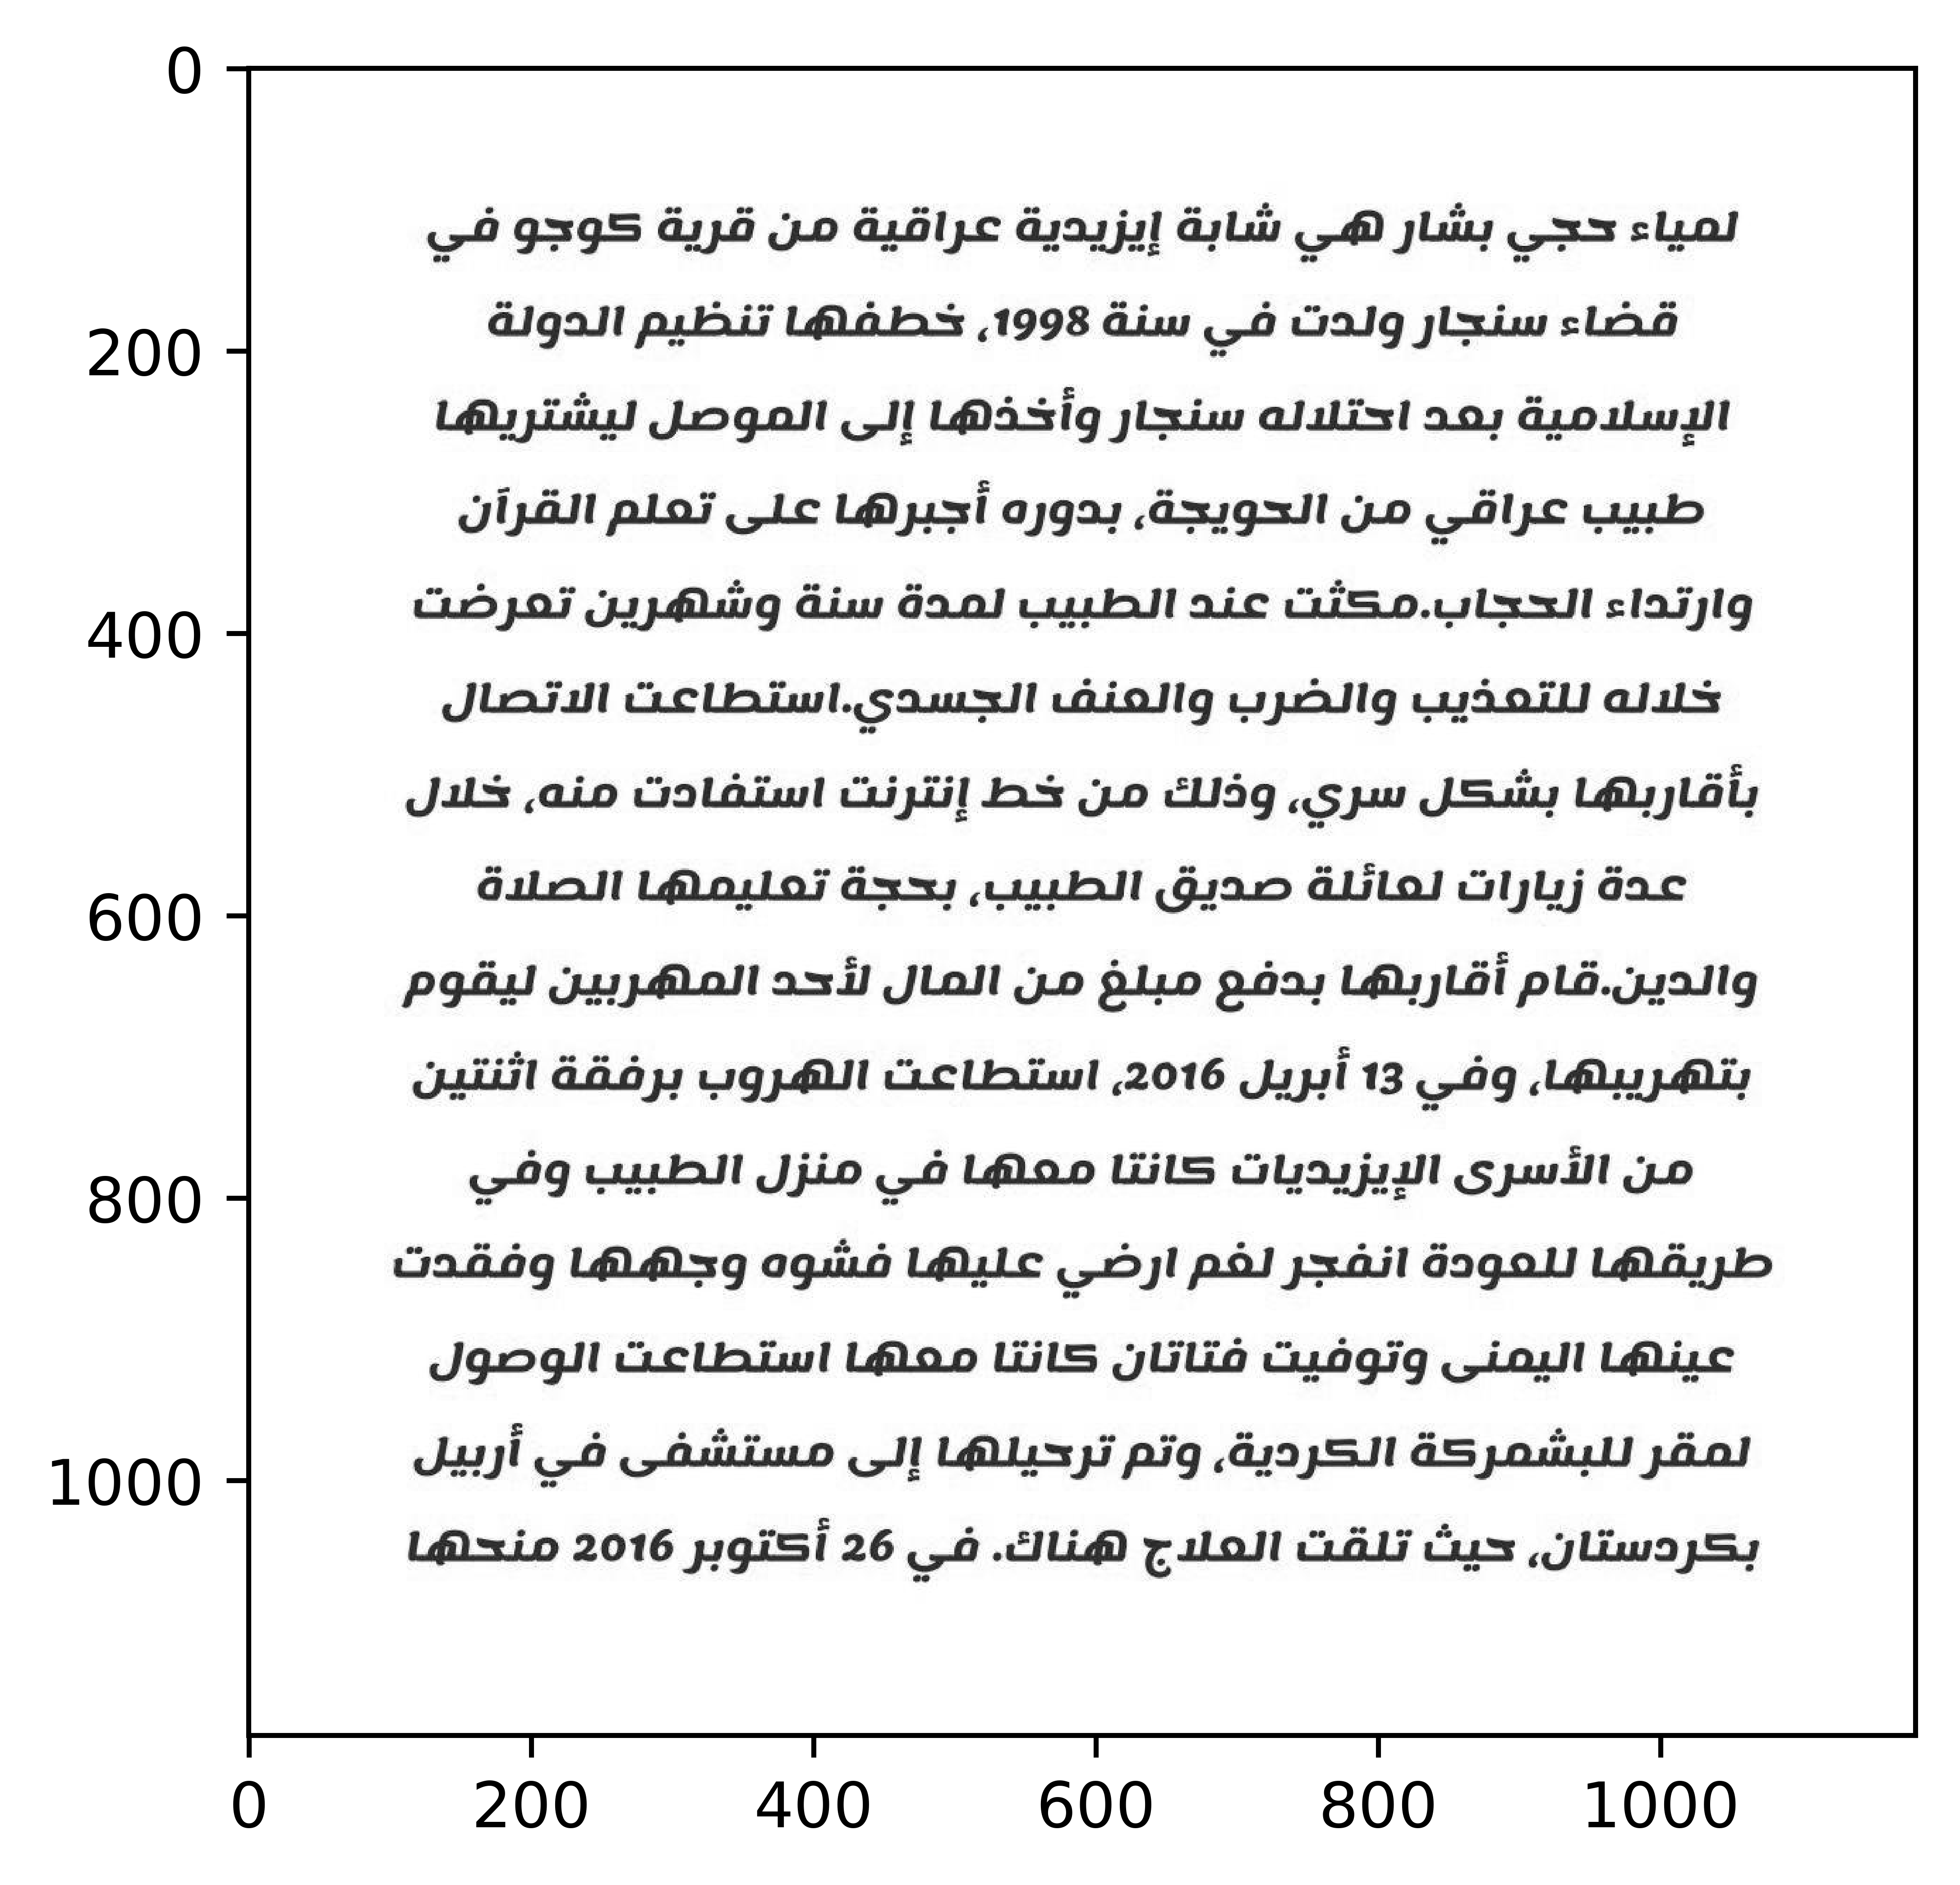

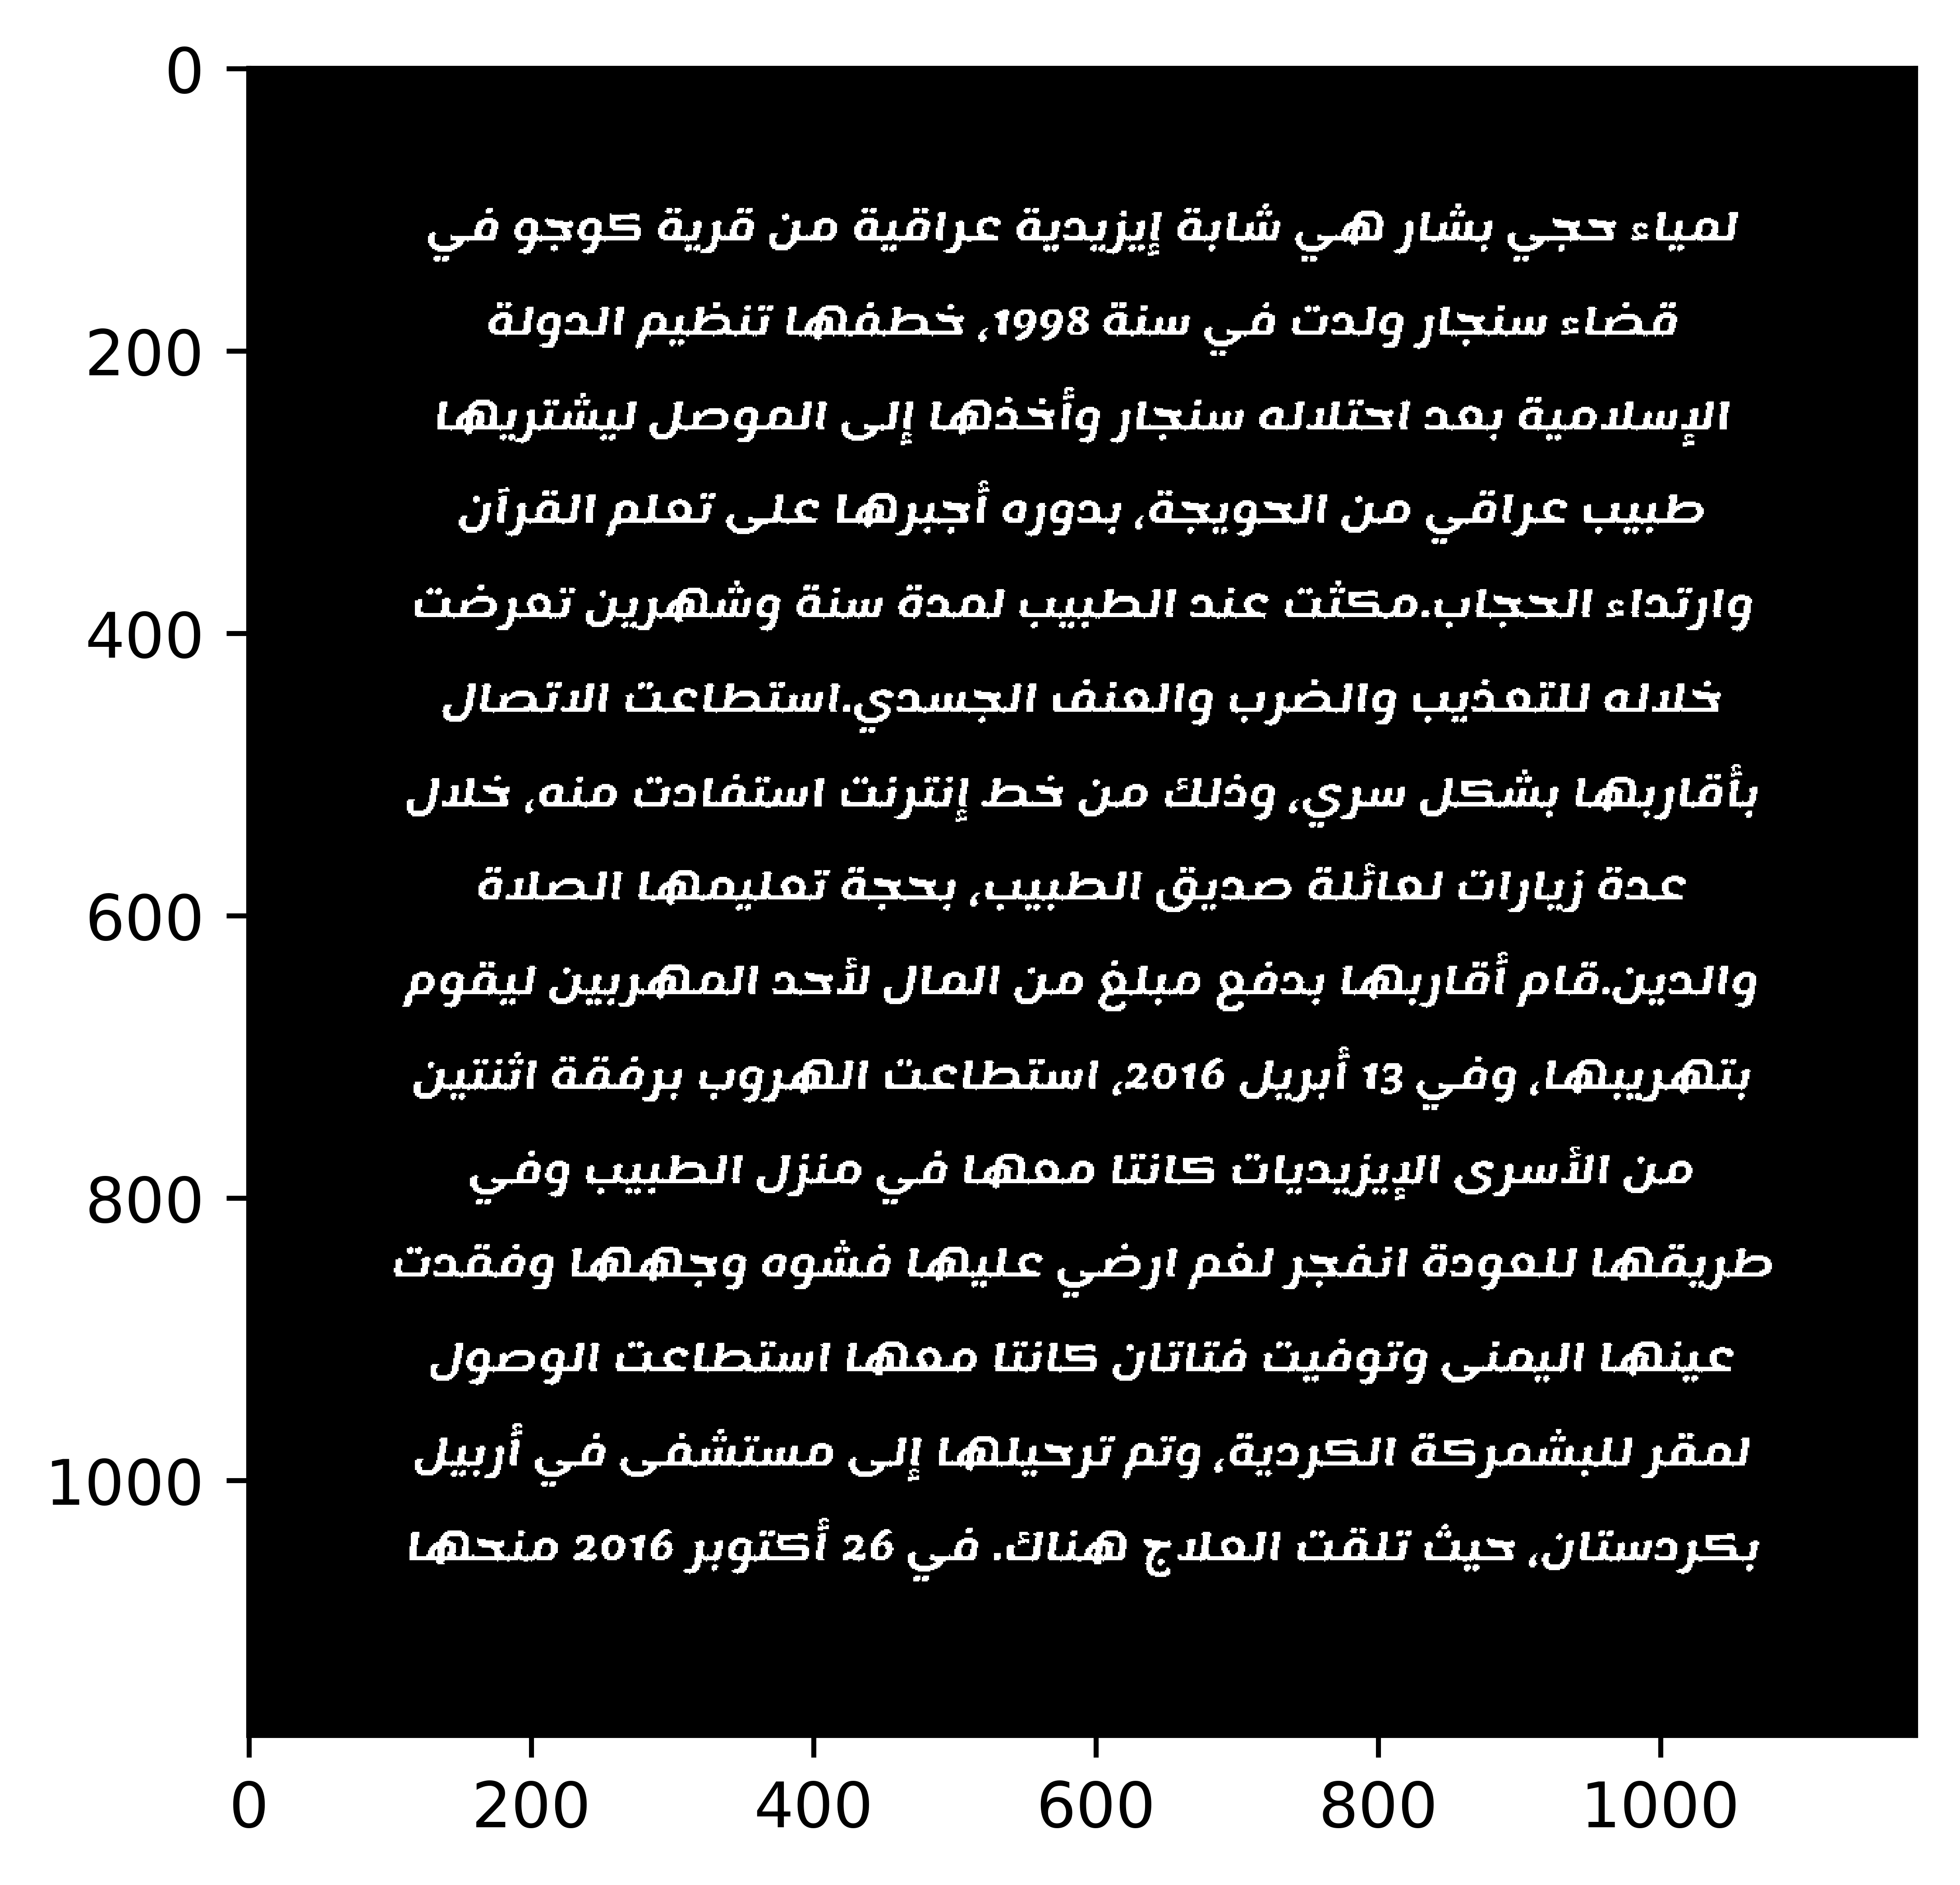

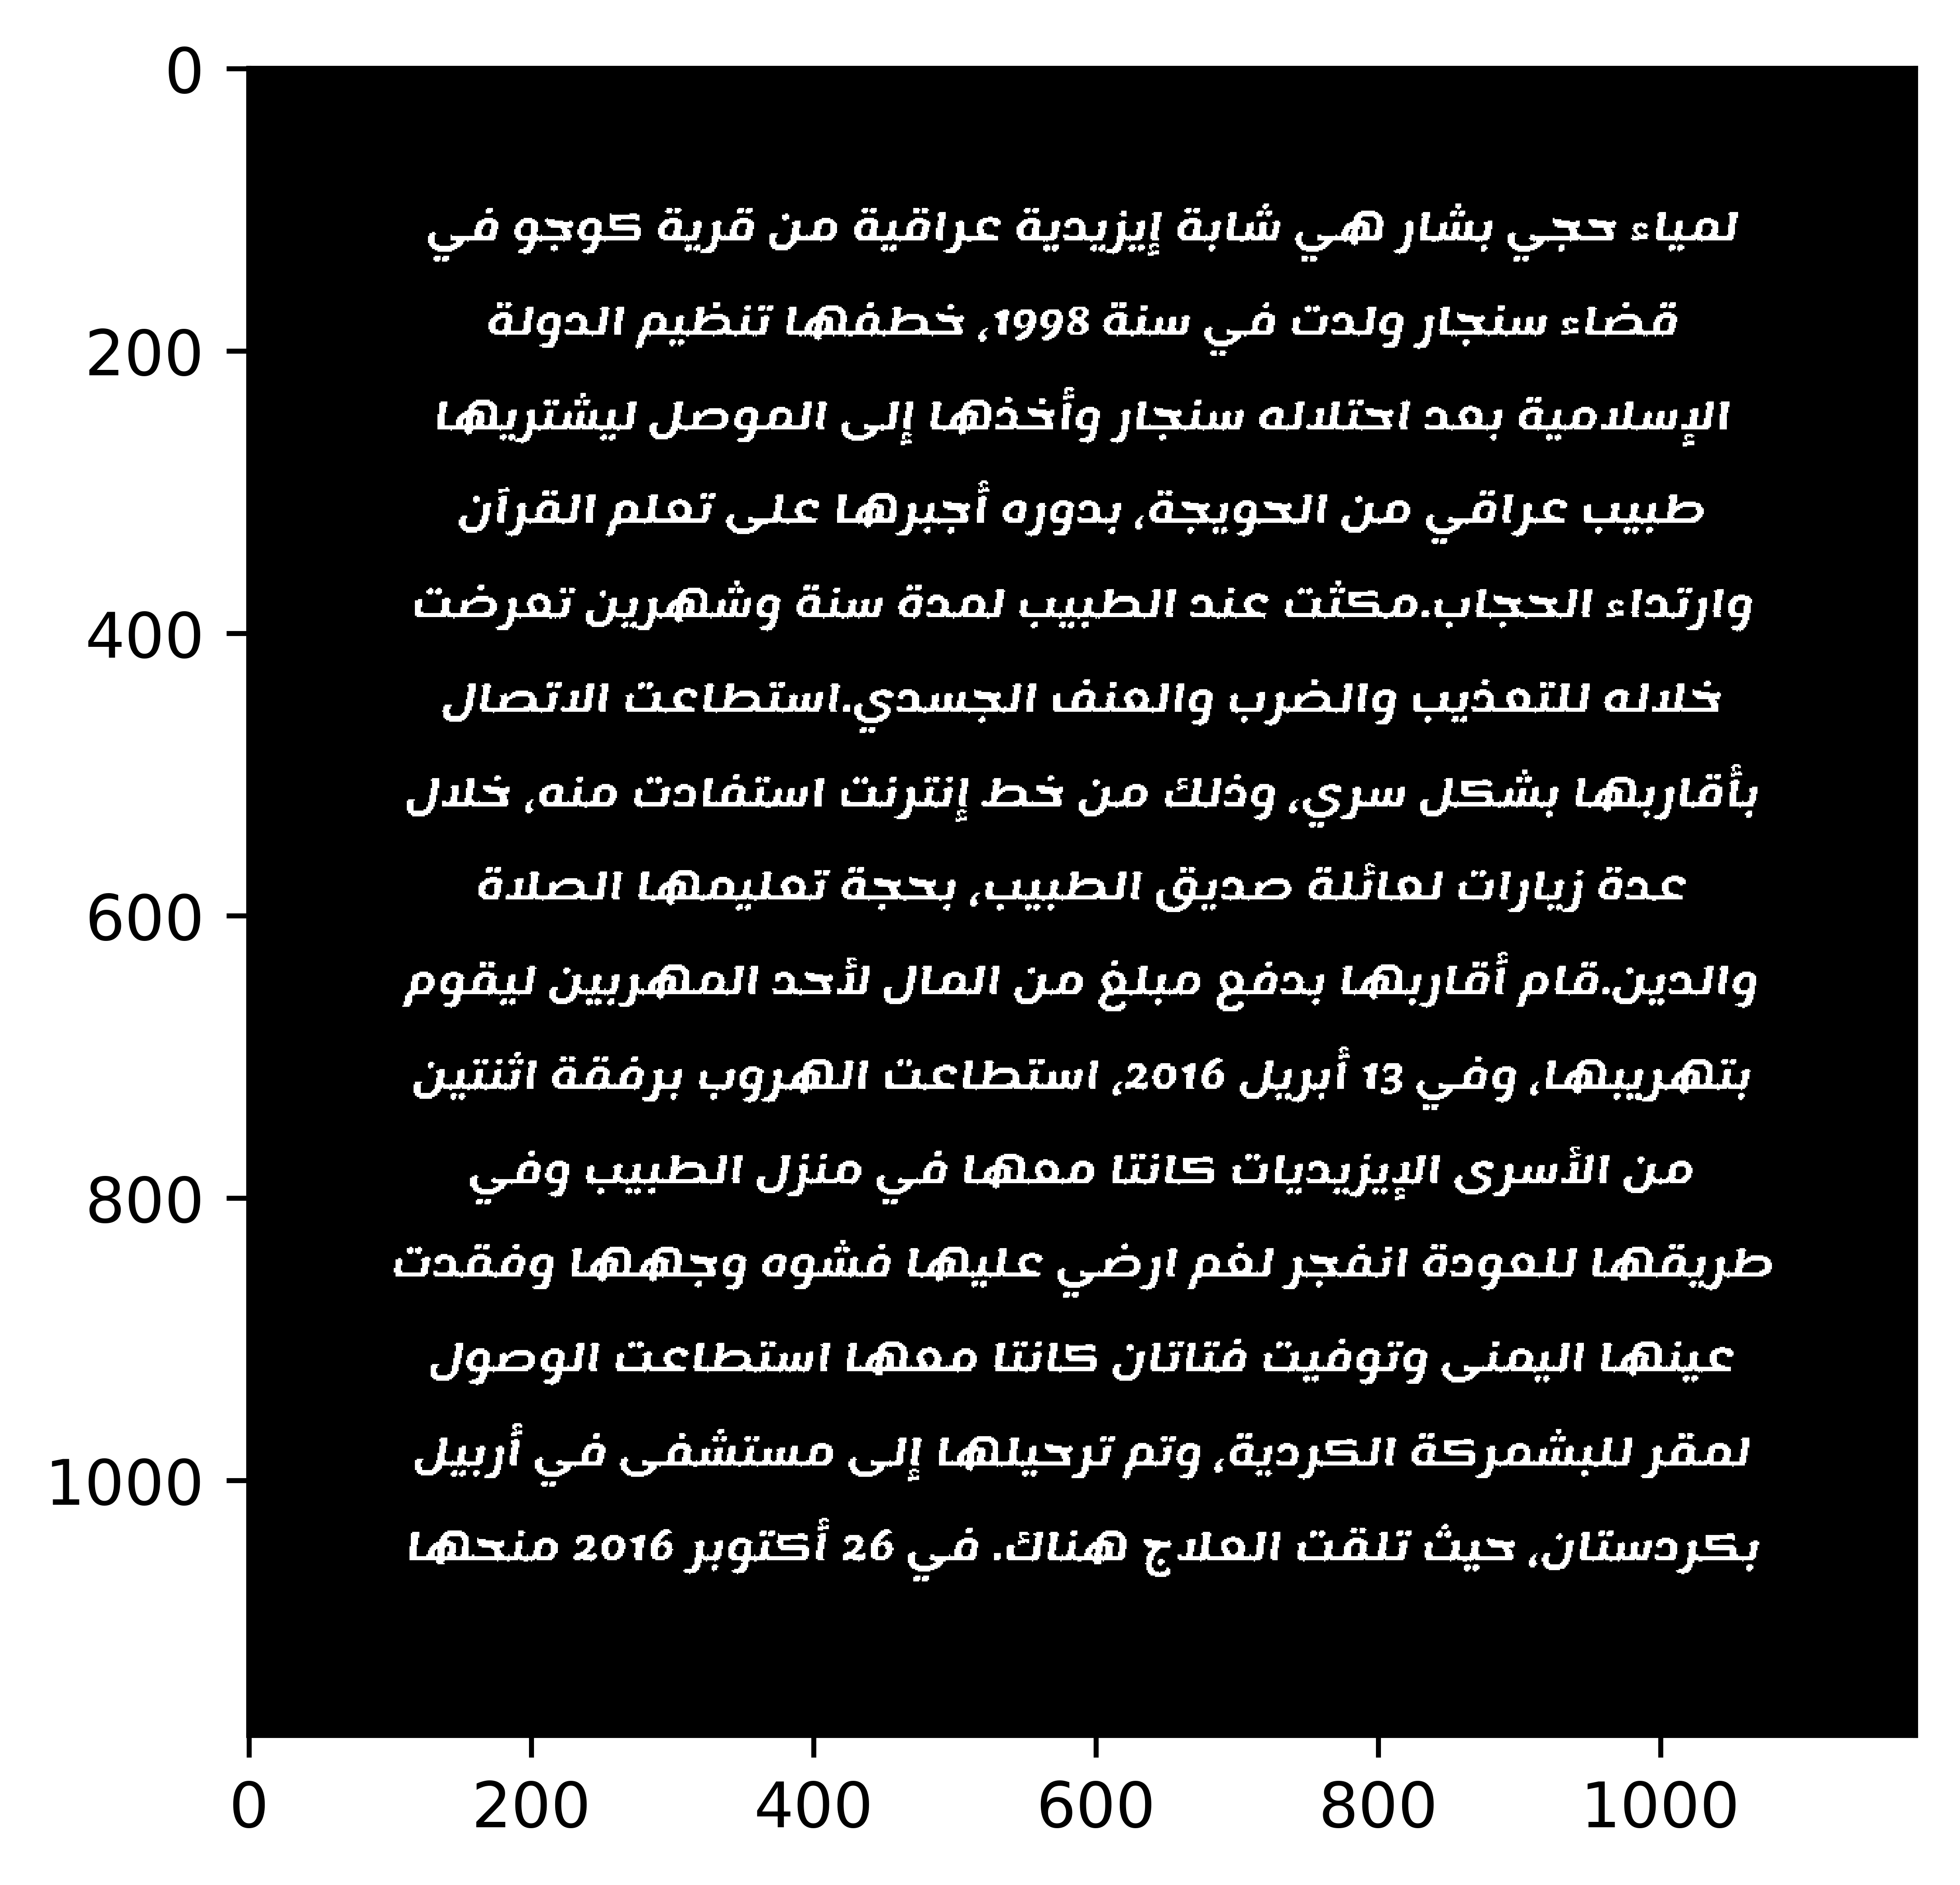

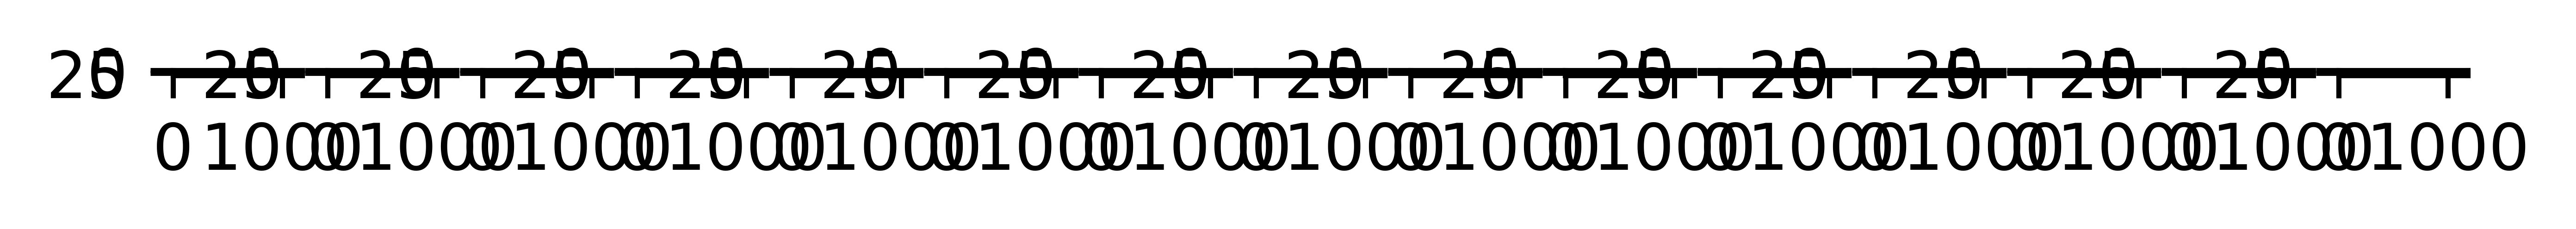

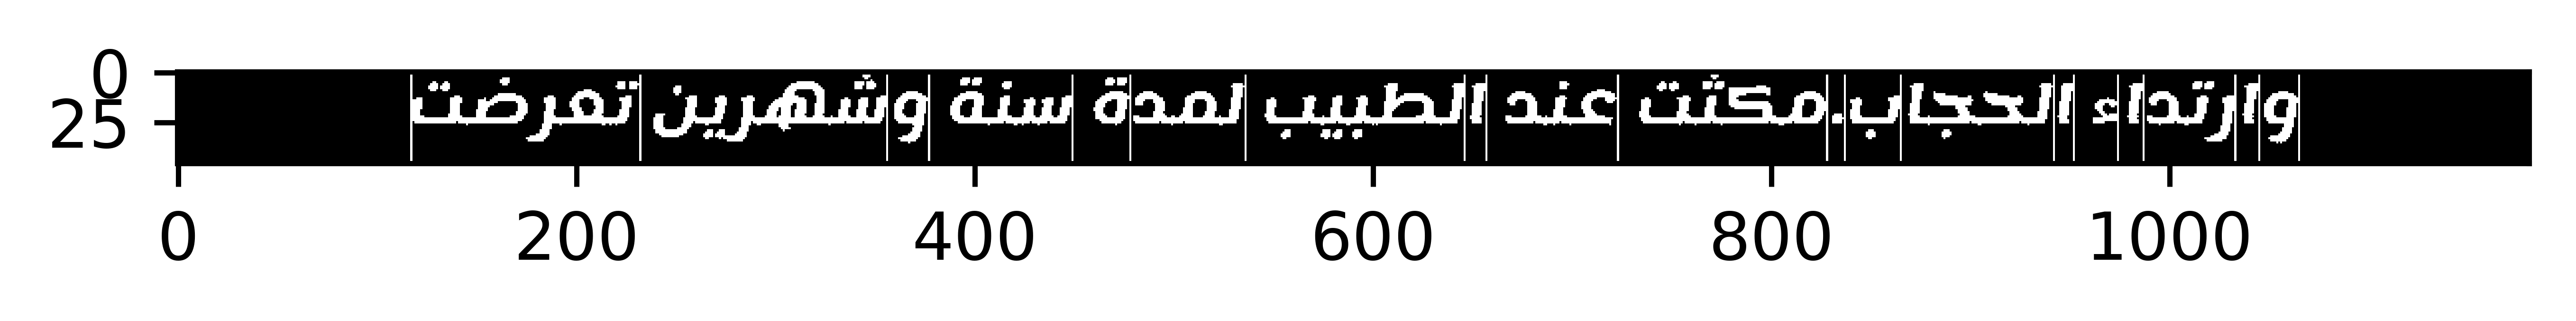

7.75 8.555555555555555
[117, 232, 377, 449, 536, 657, 723, 952, 1065]


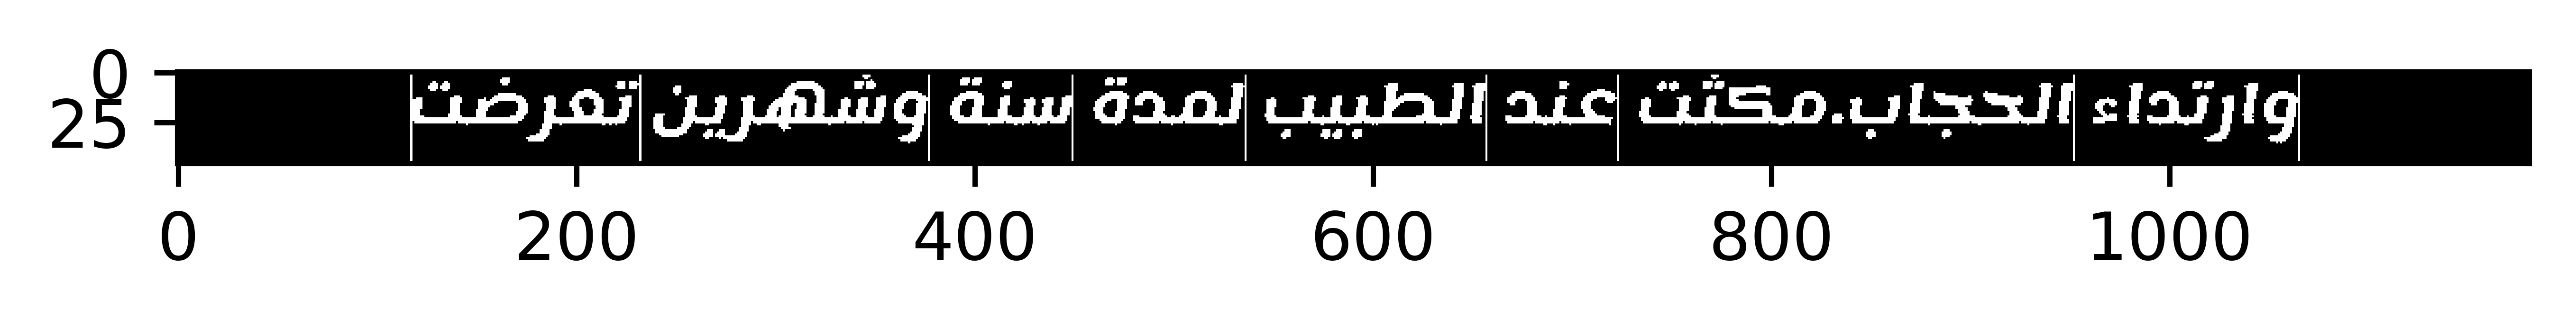

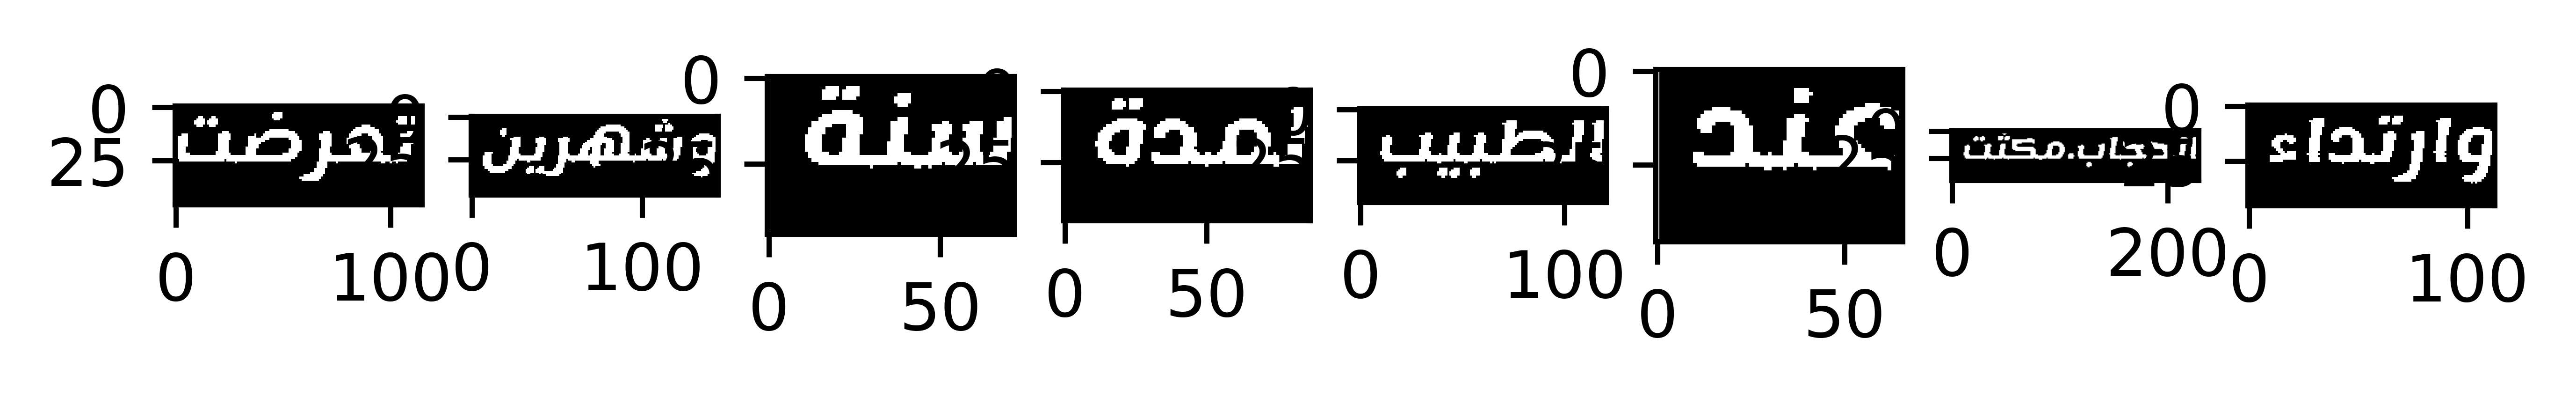

In [7]:
path = "D:\\archive\\fonts-dataset\\Lemonada\\"
image = ImageLoader.loadImage(path,"1.jpeg")
alteredImage=image
ImageLoader.print(alteredImage)
# alteredImage = NoiseRemoval.applyGaussianBlur(image=image)
# ImageLoader.print(alteredImage,sep=False)
# alteredImage = NoiseRemoval.sharpenImage(alteredImage)
alteredImage = Segmentation.segment(alteredImage)
ImageLoader.print(alteredImage)
alteredImage = OrientationDetector.rotate(alteredImage)
ImageLoader.print(alteredImage)
alteredImage = LineCutter.extractLines(alteredImage)
ImageLoader.print(alteredImage)
alteredImage = WordCutter.extractWords(alteredImage[4])
#alteredImage = CharCutter.extractCharacters(alteredImage)
# cv2.imshow("",alteredImage[0])
# cv2.waitKey(0)
#print(alteredImage)
ImageLoader.print(alteredImage)
for i in range(0,len(alteredImage)):
    alteredImage[i] = alteredImage[i].tolist()

In [8]:
#ImageLoader.print(alteredImage)
alteredImage2 = CharCutter.extractCharacters(alteredImage)
# for ii in alteredImage2:
#     for jj in ii:
        # print(jj.StartIndex,jj.CutIndex,jj.EndIndex)
# print(alteredImage2)
#ImageLoader.print(alteredImage2,sep=True)



# ImageLoader.print(alteredImage2)
# lll = [[[1,2,3],[4,5,6],[7,8,9]],[[10,11,12],[13,14,15],[16,17,18]]]
# print(lll)

9
[15]
9
0
End: 5
Start: 21
End Pixel: 255
Start Pixel: 255
1
End: 25
Start: 35
End Pixel: 255
Start Pixel: 255
2
End: 37
Start: 41
End Pixel: 255
Start Pixel: 255
3
End: 43
Start: 54
End Pixel: 255
Start Pixel: 255
4
End: 57
Start: 68
End Pixel: 255
Start Pixel: 255
5
End: 72
Start: 82
End Pixel: 255
Start Pixel: 255
6
End: 84
Start: 93
End Pixel: 255
Start Pixel: 255
7
End: 96
Start: 107
End Pixel: 255
Start Pixel: 255
Valid Separation regions for word 0 : 
S length: 9
V length: 5
14
[15, 22]
14
1
End: 11
Start: 24
End Pixel: 255
Start Pixel: 255
2
End: 27
Start: 39
End Pixel: 255
Start Pixel: 255
3
End: 41
Start: 53
End Pixel: 255
Start Pixel: 255
4
End: 56
Start: 65
End Pixel: 255
Start Pixel: 255
5
End: 68
Start: 72
End Pixel: 255
Start Pixel: 255
6
End: 75
Start: 79
End Pixel: 255
Start Pixel: 255
7
End: 82
Start: 89
End Pixel: 255
Start Pixel: 255
8
End: 91
Start: 101
End Pixel: 255
Start Pixel: 255
9
End: 104
Start: 110
End Pixel: 255
Start Pixel: 255
10
End: 113
Start: 119
End

In [1]:
from ImageLoader import *
from NoiseRemoval import *
from Segmentation import *
from OrientationDetector import *
from LineCutter import *
from WordCutter import *
from CharCutter import *
from FeatureExtractor import *
from Classifier import *
import numpy as np
plt.rc("figure", dpi=1000)

In [2]:
feature_extractor = FeatureExtractor()
feature_extractor.loadDataset("D:\\char_4K_sample\\char_sample\\")
features = feature_extractor.extractFeatures()
classifier = Classifier()
classifier.train(features)

116000


In [28]:
# alfs = ImageLoader.loadImages("D:\\char_4K_sample\\char_sample\\19\\")
# length = len(alfs)
# cnt = 0
# for alf in alfs:
#     result = classifier.classify(alf)
#     if result == 18:
#         cnt+=1
# print(cnt/length*100)


import cv2
import numpy as np

def crop_to_fit_white_with_border(image, border_size=10):
    _, binary = cv2.threshold(image, 1, 255, cv2.THRESH_BINARY)
    
    # Find contours in the binary mask
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Get the minimum bounding rectangle around the contours
    rect = cv2.minAreaRect(contours[0])
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    
    # Expand the bounding box to add borders
    x, y, w, h = cv2.boundingRect(box)
    x -= border_size
    y -= border_size
    w += 2 * border_size
    h += 2 * border_size
    
    # Ensure the expanded bounding box is within image boundaries
    x = max(x, 0)
    y = max(y, 0)
    w = min(w, image.shape[1] - x)
    h = min(h, image.shape[0] - y)
    
    # Crop the image using the expanded bounding box
    cropped_image = image[y:y+h, x:x+w]
    
    return cropped_image

# sheen = ImageLoader.loadImage("D:\\char_4K_sample\\char_sample\\19\\","88.png")
# result = classifier.classify(alteredImage2[1])
# print(result+1)
# ImageLoader.print( cv2.resize(alteredImage2[1], (10, 20), interpolation=cv2.INTER_AREA))

C:\Users\lenovo\AppData\Local\Temp\ipykernel_22120\1431602689.py:23: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


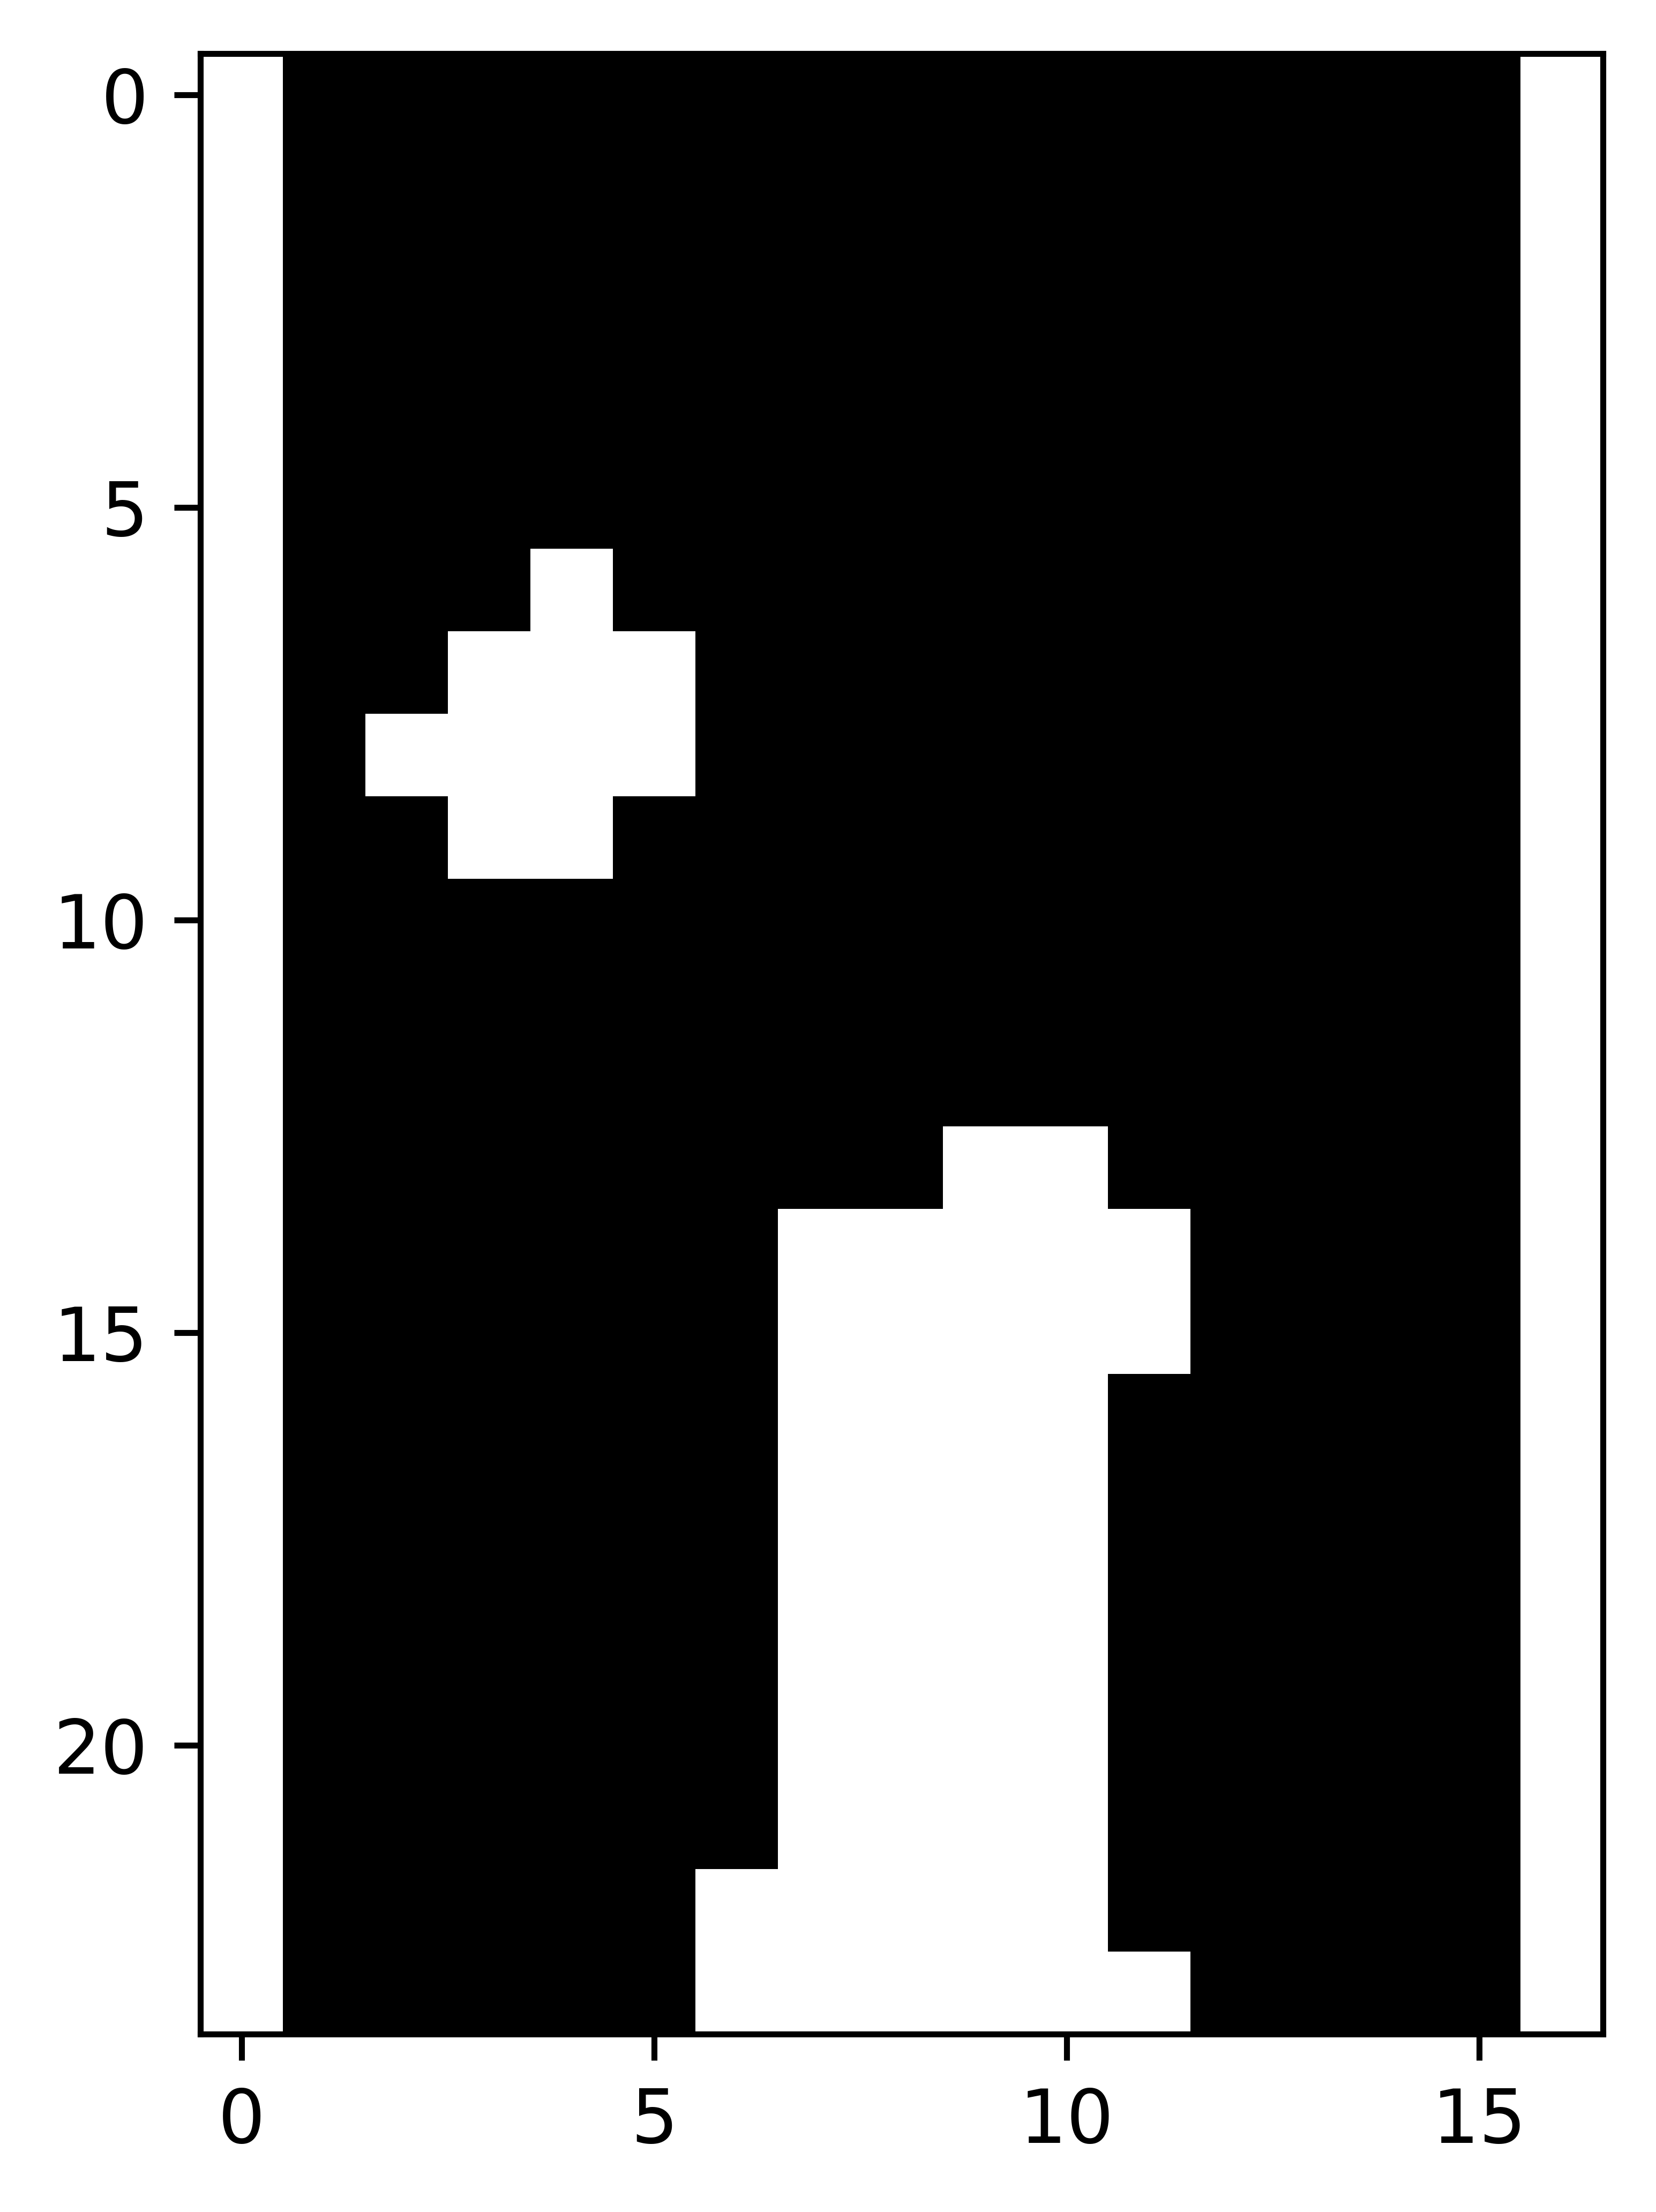

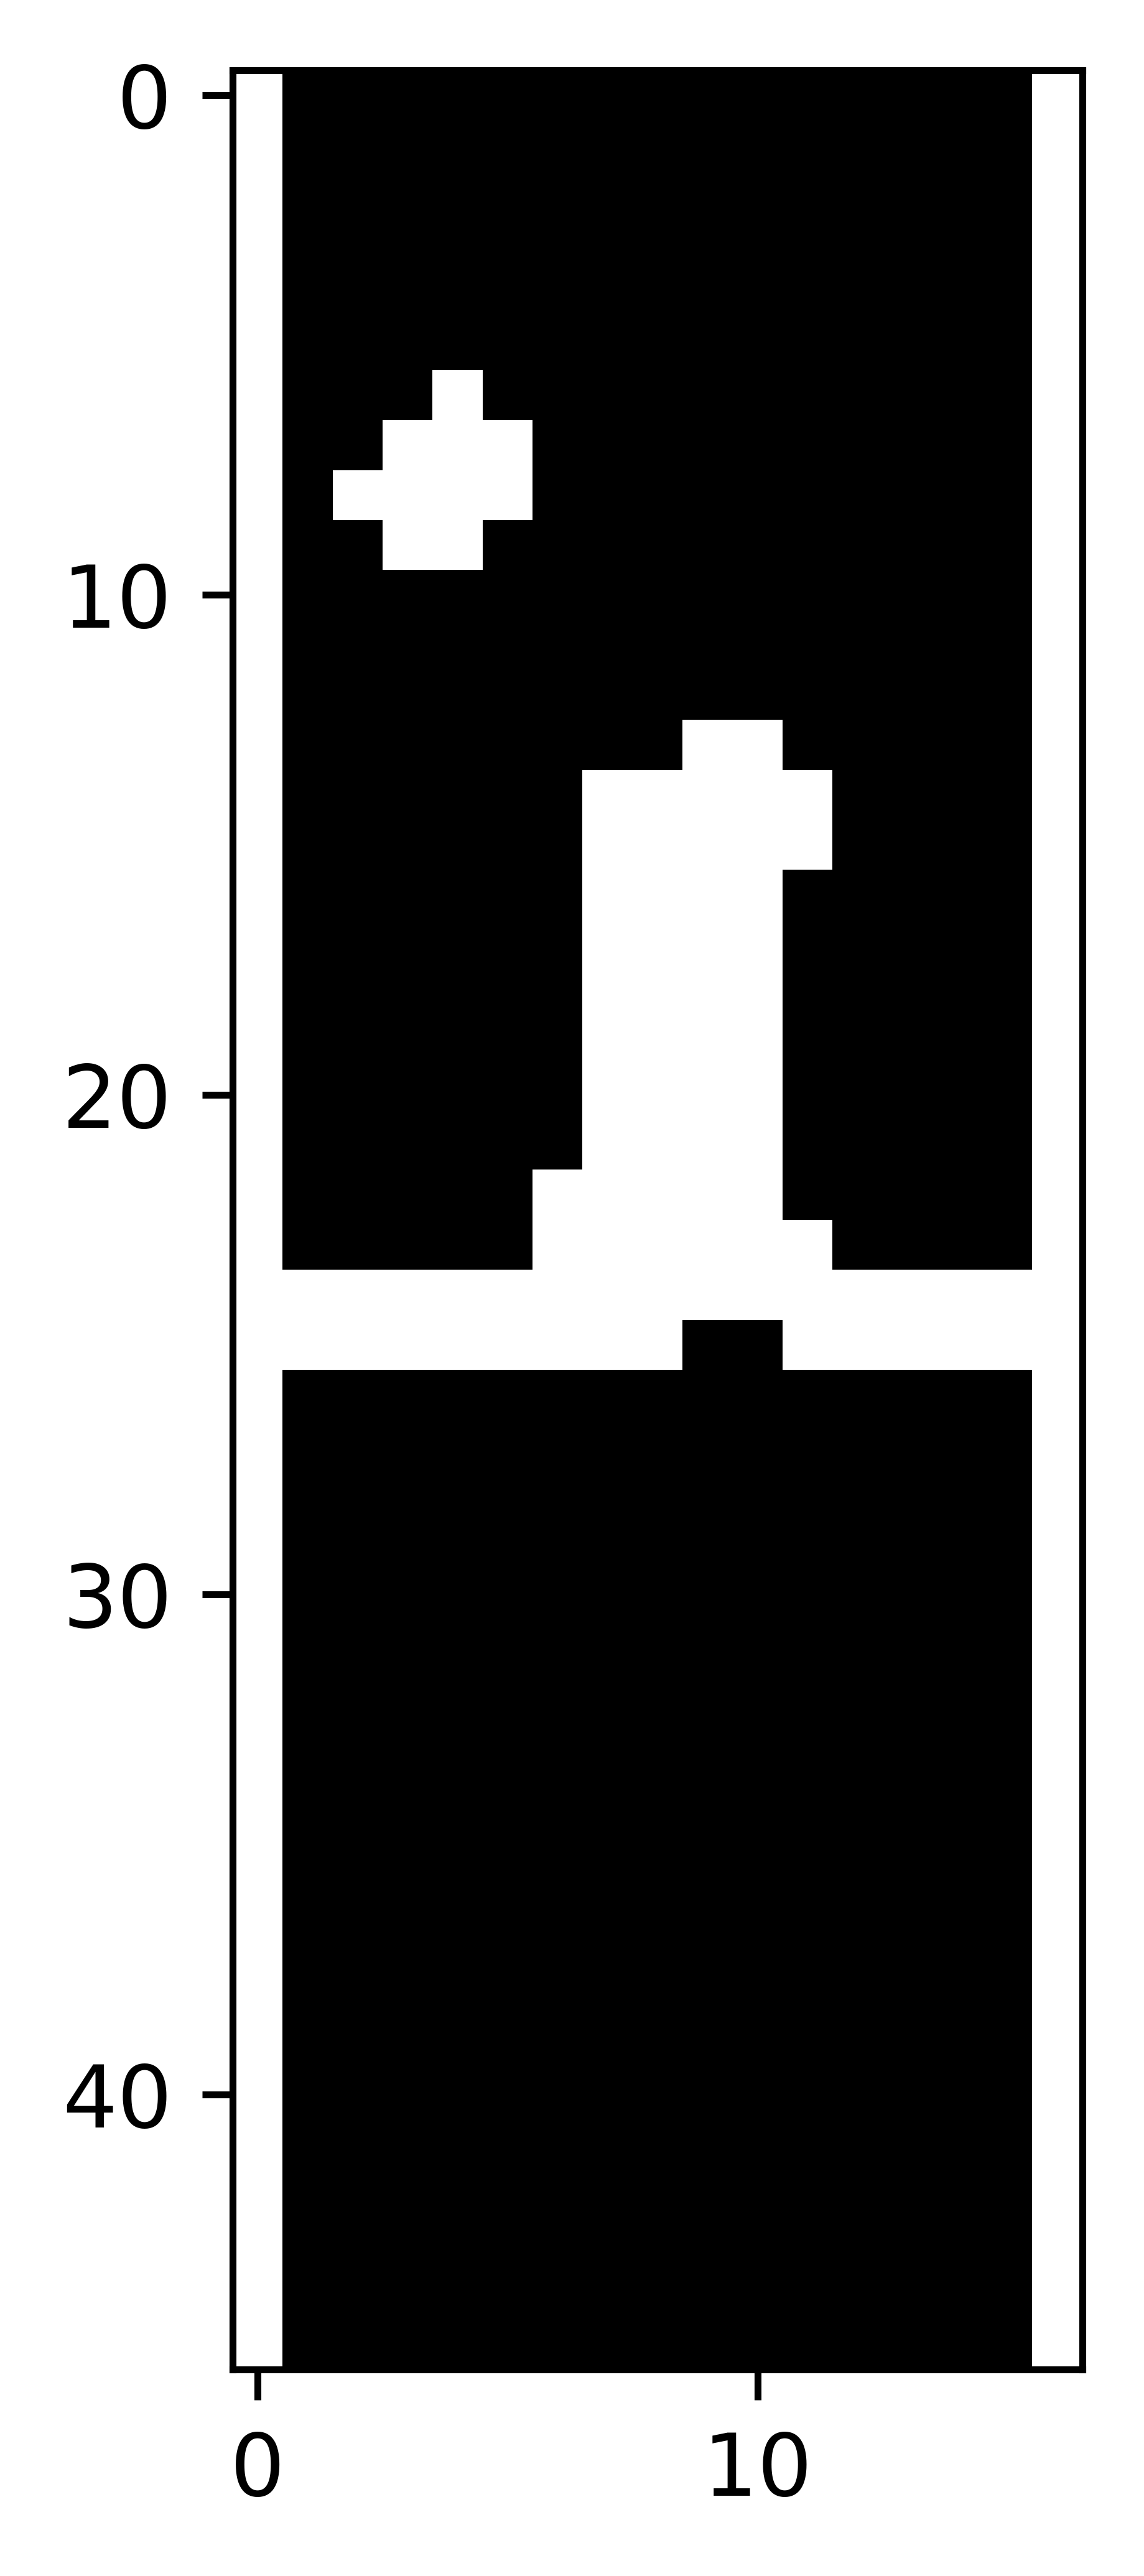

In [32]:
ImageLoader.print(crop_to_fit_white_with_border(alteredImage2[1]))
ImageLoader.print(alteredImage2[1])